In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [86]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
submit = pd.read_csv("./data/sample_submit.csv", header=None)

In [87]:
print("train.shape:", train.shape)
print("test.shape:", test.shape)
print("submit.shape:", submit.shape)

train.shape: (55583, 29)
test.shape: (18528, 28)
submit.shape: (18528, 2)


In [88]:
train.head(10)

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,y
0,0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,t,My place is meant for family and a few friends...,2016-07-27,t,f,NaN,2016-07-13,f,2016-07-27,33.788931,-118.154761,The Penthouse,NaN,1,Apartment,60.0,Private room,NaN,90804,138.0
1,1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,This is a new listing for a lovely guest bedro...,2016-09-12,t,t,100%,2015-12-30,f,2017-03-31,38.934810,-76.978190,Guest Bedroom in Brookland,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,42.0
2,2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,t,We're looking forward to your stay at our apt....,2016-06-15,t,f,100%,2016-05-21,t,2017-08-13,40.695118,-73.926240,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN,65.0
3,3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,SF,t,BEST CITY VIEWS - - ROOF DECK W/ BBQ & WiFi - ...,2014-03-15,t,t,100%,2012-06-19,t,2017-09-03,37.796728,-122.411906,BEST views + reviews! 5/5 stars*****,Nob Hill,38,Apartment,95.0,Private room,NaN,94133,166.0
4,4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,t,Charming Apartment on the upper west side of M...,2015-08-05,t,t,100%,2015-03-25,f,2017-09-10,40.785050,-73.974691,Charming 1-bedroom - UWS Manhattan,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024,165.0
5,5,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",1.0,Real Bed,1.0,1.0,flexible,NYC,t,I have other listings in the same apartment: h...,2017-02-10,t,t,100%,2016-11-29,f,2017-09-15,40.640241,-74.015729,"Close NYU Langone H, Room A/3min to Subway",Sunset Park,7,House,94.0,Private room,https://a0.muscache.com/im/pictures/dd071463-3...,11220,55.0
6,6,2,"{Internet,""Wireless Internet"",Kitchen,""Free pa...",1.5,Real Bed,1.0,1.0,moderate,NYC,t,"Stay in a Cozy, Private bedroom in newly renov...",2015-05-15,t,t,100%,2014-05-29,t,2017-09-05,40.676824,-73.915965,Cozy Artist Bedroom less than 30 min to Manhattan,Bedford-Stuyvesant,65,House,91.0,Private room,https://a0.muscache.com/im/pictures/79595629/9...,11233,48.0
7,7,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Pull-out Sofa,1.0,1.0,flexible,LA,f,- Located in beautiful Park LaBrea Apartments ...,NaN,t,f,NaN,2010-08-31,f,NaN,34.068441,-118.353515,1 BR Available In Park La Brea Apts,Mid-Wilshire,0,Apartment,NaN,Private room,NaN,90036,150.0
8,8,2,"{""Wireless Internet"",""Air conditioning"",""Pets ...",1.0,Real Bed,1.0,1.0,strict,SF,t,Very bright & cozy private room right in the h...,2017-06-06,t,f,100%,2016-07-09,f,2017-09-16,37.801514,-122.411410,PERFECT Location in North Beach,North Beach,21,Apartment,87.0,Private room,https://a0.muscache.com/im/pictures/b1e47fdc-1...,94133,95.0
9,9,2,"{""Wireless Internet"",""Air conditioning"",Heatin...",1.0,Real Bed,1.0,1.0,moderate,NYC,t,Basic room with all basic facility for low $ d...,2012-12-08,t,f,100%,2011-10-09,f,2016-09-17,40.751933,-73.878733,"1 BR, Book it 1st then write me",Jackson Heights,27,House,88.0,Private room,https://a0.muscache.com/im/pictures/9976697/fc...,11372,79.0


In [89]:
test.head(3)

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode
0,0,6,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",2.0,Real Bed,2.0,2.0,strict,Boston,t,Feel free to book INSTANTLY. You can check-in ...,2017-01-09,t,f,100%,2016-08-23,t,2017-09-25,42.359278,-71.069962,Gorgeous 2BR/2BA Duplex in Beacon Hill,Beacon Hill,58,House,90.0,Entire home/apt,https://a0.muscache.com/im/pictures/7e4808b4-5...,02114
1,1,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,moderate,LA,t,The guest house is close to: Equinox West Holl...,2016-08-17,t,t,100%,2014-09-03,f,2017-05-02,34.084747,-118.367355,Luxury 1 Bedroom West Hollywood City Center,West Hollywood,4,Guesthouse,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/5392fbd6-6...,90046
2,2,2,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",1.0,Real Bed,0.0,1.0,flexible,NYC,f,Private room in a three bedroom apartment in N...,NaN,t,t,100%,2012-10-17,f,NaN,40.720541,-73.959192,Bedroom with Patio in Prime Williamsburg Locat...,Williamsburg,0,Apartment,NaN,Private room,https://a0.muscache.com/im/pictures/544d3b89-d...,11249.0


In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55583 entries, 0 to 55582
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      55583 non-null  int64  
 1   accommodates            55583 non-null  int64  
 2   amenities               55583 non-null  object 
 3   bathrooms               55436 non-null  float64
 4   bed_type                55583 non-null  object 
 5   bedrooms                55512 non-null  float64
 6   beds                    55487 non-null  float64
 7   cancellation_policy     55583 non-null  object 
 8   city                    55583 non-null  object 
 9   cleaning_fee            55583 non-null  object 
 10  description             55583 non-null  object 
 11  first_review            43675 non-null  object 
 12  host_has_profile_pic    55435 non-null  object 
 13  host_identity_verified  55435 non-null  object 
 14  host_response_rate      41879 non-null

In [91]:
train.isnull().sum()

id                            0
accommodates                  0
amenities                     0
bathrooms                   147
bed_type                      0
bedrooms                     71
beds                         96
cancellation_policy           0
city                          0
cleaning_fee                  0
description                   0
first_review              11908
host_has_profile_pic        148
host_identity_verified      148
host_response_rate        13704
host_since                  148
instant_bookable              0
last_review               11880
latitude                      0
longitude                     0
name                          0
neighbourhood              5160
number_of_reviews             0
property_type                 0
review_scores_rating      12556
room_type                     0
thumbnail_url              6145
zipcode                     716
y                             0
dtype: int64

In [92]:
train.describe()

,id,accommodates,bathrooms,bedrooms,beds,latitude,longitude,number_of_reviews,review_scores_rating,y
count,55583.000000,55583.000000,55436.000000,55512.000000,55487.000000,55583.000000,55583.000000,55583.000000,43027.000000,55583.000000
mean,27791.000000,3.152906,1.236426,1.265312,1.711770,38.450812,-92.342406,20.937283,94.077928,160.163647
std,16045.574343,2.153001,0.583074,0.849319,1.257822,3.080869,21.687844,37.951889,7.802154,168.087140
min,0.000000,1.000000,0.000000,0.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,1.000000
25%,13895.500000,2.000000,1.000000,1.000000,1.000000,34.128205,-118.341876,1.000000,92.000000,74.000000
50%,27791.000000,2.000000,1.000000,1.000000,1.000000,40.663312,-76.995602,6.000000,96.000000,111.000000
75%,41686.500000,4.000000,1.000000,1.000000,2.000000,40.746146,-73.954703,23.000000,100.000000,185.000000
max,55582.000000,16.000000,8.000000,10.000000,18.000000,42.390437,-70.999166,605.000000,100.000000,1999.000000


In [93]:
train.describe(include=["O"])

,amenities,bed_type,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,name,neighbourhood,property_type,room_type,thumbnail_url,zipcode
count,55583,55583,55583,55583,55583,55583,43675,55435,55435,41879,55435,55583,43703,55583,50423,55583,55583,49438,54867
unique,51031,5,5,6,2,55221,2446,2,2,78,3047,2,1298,55152,607,34,3,49431,737
top,{},Real Bed,strict,NYC,t,"Hello, I've been running guest house for Korea...",2017-01-01,t,t,100%,2015-03-30,f,2017-04-30,Your home away from home,Williamsburg,Apartment,Entire home/apt,https://a0.muscache.com/im/pictures/70087089/b...,11211.0
freq,435,53989,24318,24326,40821,8,214,55265,37264,32510,172,41034,1021,6,2189,36826,30939,3,1065


In [95]:
cols = ["accommodates", "bathrooms", "bedrooms", "beds", "latitude", "longitude", "number_of_reviews", "review_scores_rating", "y"]

In [96]:
train[cols].corr()

,accommodates,bathrooms,bedrooms,beds,latitude,longitude,number_of_reviews,review_scores_rating,y
accommodates,1.000000,0.502278,0.708510,0.806654,-0.079395,-0.086365,0.042320,-0.017824,0.522330
bathrooms,0.502278,1.000000,0.586366,0.524847,-0.135427,-0.132046,-0.040262,0.006698,0.456044
bedrooms,0.708510,0.586366,1.000000,0.708230,-0.057502,-0.074027,-0.033761,0.009996,0.495830
beds,0.806654,0.524847,0.708230,1.000000,-0.080307,-0.082434,0.030914,-0.027839,0.435603
latitude,-0.079395,-0.135427,-0.057502,-0.080307,1.000000,0.896581,-0.016439,-0.035133,-0.028940
longitude,-0.086365,-0.132046,-0.074027,-0.082434,0.896581,1.000000,-0.048660,-0.050019,-0.056236
number_of_reviews,0.042320,-0.040262,-0.033761,0.030914,-0.016439,-0.048660,1.000000,0.012144,-0.068944
review_scores_rating,-0.017824,0.006698,0.009996,-0.027839,-0.035133,-0.050019,0.012144,1.000000,0.065896
y,0.522330,0.456044,0.495830,0.435603,-0.028940,-0.056236,-0.068944,0.065896,1.000000


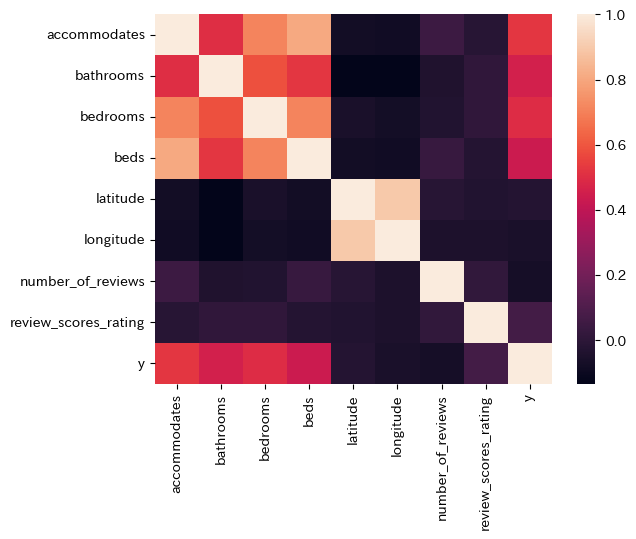

In [97]:
sns.heatmap(train[cols].corr())
plt.show()

In [98]:
train.corr().style.background_gradient(cmap='Reds')

,id,accommodates,bathrooms,bedrooms,beds,latitude,longitude,number_of_reviews,review_scores_rating,y
id,1.000000,0.005027,0.005182,0.002463,0.005736,-0.007358,-0.005771,0.004658,0.002307,-0.001129
accommodates,0.005027,1.000000,0.502278,0.708510,0.806654,-0.079395,-0.086365,0.042320,-0.017824,0.522330
bathrooms,0.005182,0.502278,1.000000,0.586366,0.524847,-0.135427,-0.132046,-0.040262,0.006698,0.456044
bedrooms,0.002463,0.708510,0.586366,1.000000,0.708230,-0.057502,-0.074027,-0.033761,0.009996,0.495830
beds,0.005736,0.806654,0.524847,0.708230,1.000000,-0.080307,-0.082434,0.030914,-0.027839,0.435603
latitude,-0.007358,-0.079395,-0.135427,-0.057502,-0.080307,1.000000,0.896581,-0.016439,-0.035133,-0.028940
longitude,-0.005771,-0.086365,-0.132046,-0.074027,-0.082434,0.896581,1.000000,-0.048660,-0.050019,-0.056236
number_of_reviews,0.004658,0.042320,-0.040262,-0.033761,0.030914,-0.016439,-0.048660,1.000000,0.012144,-0.068944
review_scores_rating,0.002307,-0.017824,0.006698,0.009996,-0.027839,-0.035133,-0.050019,0.012144,1.000000,0.065896
y,-0.001129,0.522330,0.456044,0.495830,0.435603,-0.028940,-0.056236,-0.068944,0.065896,1.000000


In [99]:
train.columns

Index(['id', 'accommodates', 'amenities', 'bathrooms', 'bed_type', 'bedrooms',
       'beds', 'cancellation_policy', 'city', 'cleaning_fee', 'description',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_response_rate', 'host_since', 'instant_bookable', 'last_review',
       'latitude', 'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'property_type', 'review_scores_rating', 'room_type', 'thumbnail_url',
       'zipcode', 'y'],
      dtype='object')

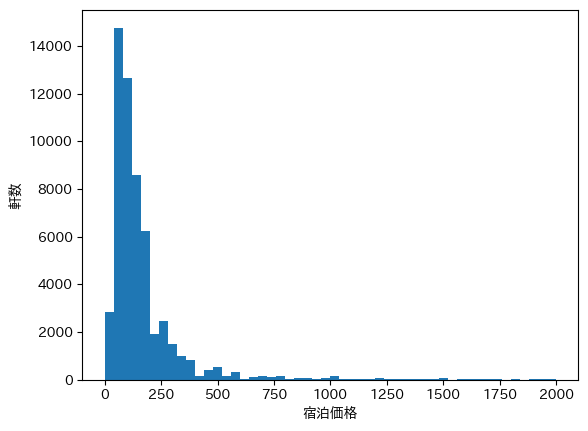

In [100]:
plt.hist(train["y"], bins=50)
plt.xlabel("宿泊価格")
plt.ylabel("軒数")
plt.show()

In [101]:
#yはfloatで欠損なし
train["y"].value_counts(ascending=False)

150.0     2054
100.0     2010
75.0      1529
200.0     1479
50.0      1437
60.0      1357
80.0      1281
125.0     1279
65.0      1244
70.0      1207
99.0      1193
120.0     1166
250.0     1101
90.0      1083
95.0       998
85.0       994
55.0       908
175.0      867
110.0      811
45.0       806
40.0       669
130.0      665
300.0      652
115.0      605
199.0      573
140.0      561
89.0       549
225.0      527
135.0      516
79.0       508
69.0       491
350.0      469
160.0      465
180.0      454
105.0      414
49.0       408
35.0       408
59.0       407
129.0      401
149.0      396
145.0      391
195.0      356
275.0      345
165.0      337
500.0      334
400.0      327
185.0      313
119.0      300
109.0      281
170.0      278
139.0      274
30.0       269
249.0      253
190.0      244
98.0       241
450.0      239
220.0      234
155.0      233
299.0      223
169.0      218
39.0       213
189.0      210
159.0      203
88.0       191
179.0      188
68.0       178
600.0     

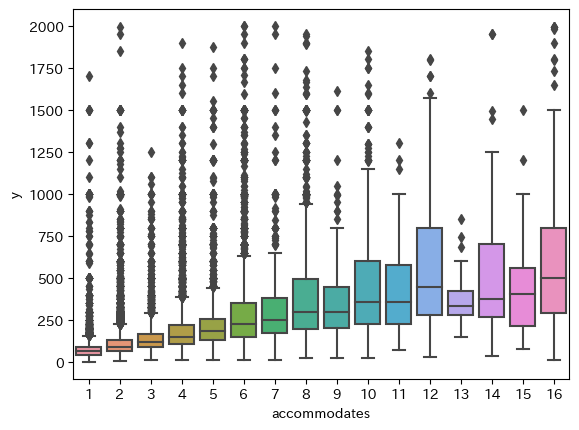

In [102]:
#accommodatesの増加とyの関係
sns.boxplot(data=train, x="accommodates", y="y")
plt.show()

In [103]:
train[["accommodates", 'y']].corr()

,accommodates,y
accommodates,1.00000,0.52233
y,0.52233,1.00000


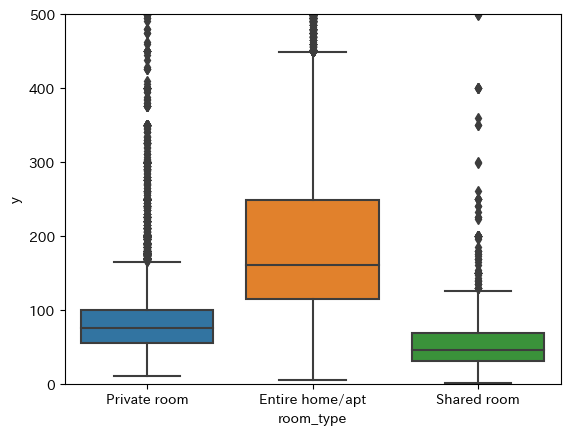

In [104]:
#room_typeとyの関係
sns.boxplot(data=train, x="room_type", y="y")
plt.ylim(0, 500)
plt.show()

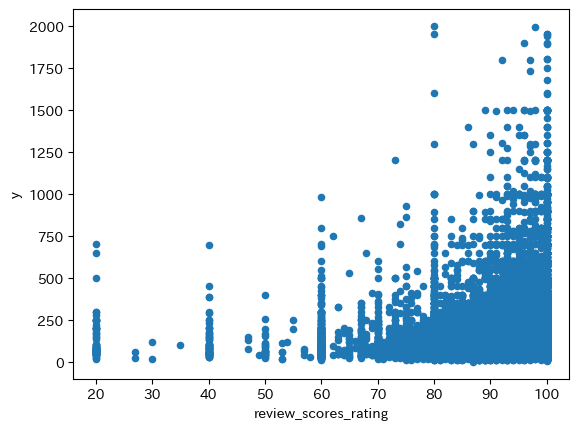

In [105]:
#review_scores_ratingとyの関係
train.plot.scatter(x="review_scores_rating", y="y")
plt.show()

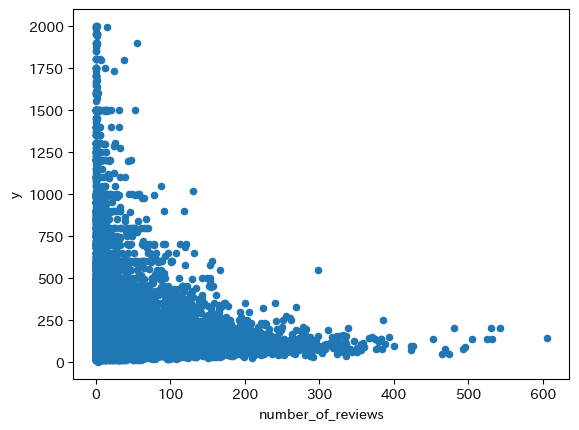

In [106]:
#number_of_reviewsとyの関係
train.plot.scatter(x="number_of_reviews", y="y")
plt.show()

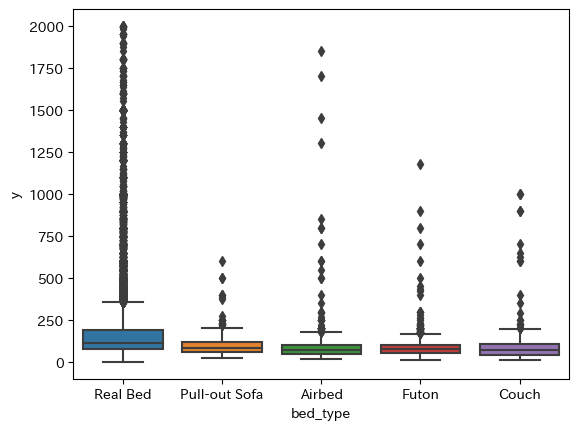

In [107]:
#bed_typeとyの関係
sns.boxplot(data=train, x="bed_type", y="y")
plt.show()

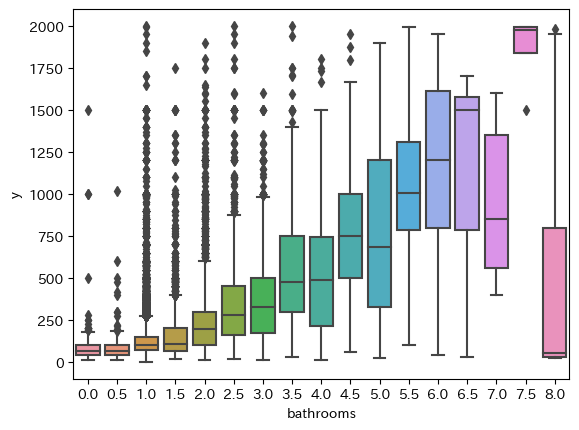

In [108]:
#bathroomsとyの関係
sns.boxplot(data=train, x="bathrooms", y="y")
plt.show()

In [109]:
train_tmp = train[(train["bathrooms"] == 0.0) & (train["y"] >= 800)]
print(train_tmp["name"])

1393            Wedding Location Malibu Mountains
20726    Automobile Parking Place in Mt. Pleasant
54988        THE PAVILION + EVENTS + LOGAN SQUARE
Name: name, dtype: object


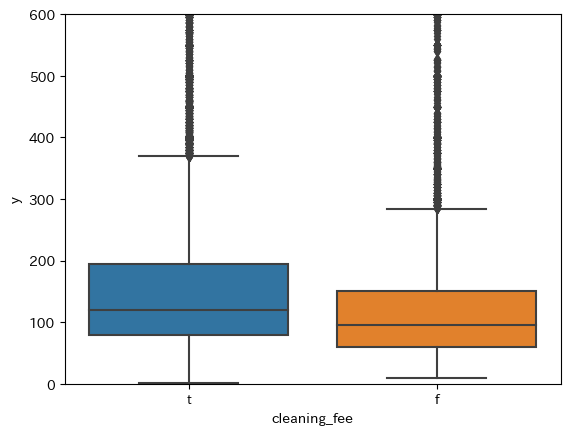

In [110]:
#cleaning_feeとyの関係
sns.boxplot(data=train, x="cleaning_fee", y="y")
plt.ylim(0, 600)
plt.show()

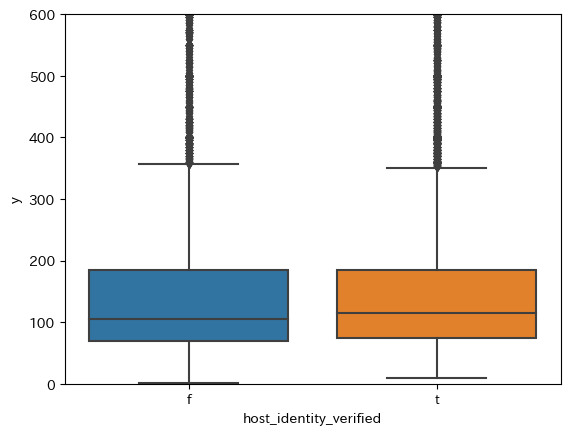

In [111]:
#host_identity_verifiedとyの関係
sns.boxplot(data=train, x="host_identity_verified", y="y")
plt.ylim(0, 600)
plt.show()

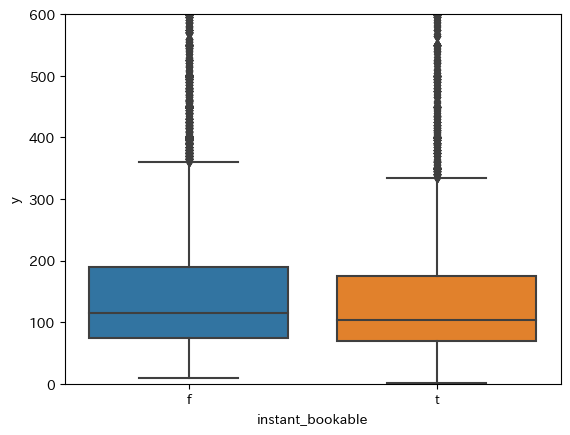

In [112]:
#instant_bookableとyの関係
sns.boxplot(data=train, x="instant_bookable", y="y")
plt.ylim(0, 600)
plt.show()

In [113]:
#host_identity_verified = {
#    "f":0,
#    "t":1
#}
#train["host_identity_verified"] = train["host_identity_verified"].replace(host_identity_verified).astype("category")

In [114]:
#train.info()

In [115]:
train["bathrooms"].mean()

1.2364257882964138

In [116]:
train["bathrooms"].describe()

count    55436.000000
mean         1.236426
std          0.583074
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: bathrooms, dtype: float64

In [117]:
beds_nan_train = train[train["beds"].isnull()]

In [118]:
#bed_typeの種類ごとの件数を表示
print(beds_nan_train['bed_type'].value_counts())

Real Bed         94
Pull-out Sofa     2
Name: bed_type, dtype: int64


In [119]:
#最も多い種類を入力
#bed_type = "Real Bed"

In [120]:
#category変換する
for col in ['amenities', 'bed_type', 'cancellation_policy', 'city', 'cleaning_fee', 'description',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_response_rate', 'host_since', 'instant_bookable', 'last_review','name',
       'neighbourhood', 'property_type','room_type', 'thumbnail_url', 'zipcode']:
    train[col] = train[col].astype("category")

In [121]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55583 entries, 0 to 55582
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      55583 non-null  int64   
 1   accommodates            55583 non-null  int64   
 2   amenities               55583 non-null  category
 3   bathrooms               55436 non-null  float64 
 4   bed_type                55583 non-null  category
 5   bedrooms                55512 non-null  float64 
 6   beds                    55487 non-null  float64 
 7   cancellation_policy     55583 non-null  category
 8   city                    55583 non-null  category
 9   cleaning_fee            55583 non-null  category
 10  description             55583 non-null  category
 11  first_review            43675 non-null  category
 12  host_has_profile_pic    55435 non-null  category
 13  host_identity_verified  55435 non-null  category
 14  host_response_rate    

In [122]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

df_train, df_val = train_test_split(train, test_size=0.3, random_state=0)

target = "y"
trainy = df_train[target]
trainX = df_train.drop(target, axis=1)

valy = df_val[target]
valX = df_val.drop(target, axis=1)

trains = lgb.Dataset(trainX, trainy)
valids = lgb.Dataset(valX, valy)

params = {
    "objective":"regression",
    "metrics":"rmse"
#    'num_leaves': 0,
#    'min_data_in_leaf': 0,
#    'max_depth': 0,
#    'verbose': 0,
}

model = lgb.train(params,
                  train_set=trains,
                  valid_sets=valids,
                  num_boost_round=1000,
                  early_stopping_rounds=100)

/Users/kumazawateruhito/opt/anaconda3/envs/base_root/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7799
[LightGBM] [Info] Number of data points in the train set: 38908, number of used features: 28
[LightGBM] [Info] Start training from score 159.926056
[1]	valid_0's rmse: 161.995
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 155.142
[3]	valid_0's rmse: 149.278
[4]	valid_0's rmse: 144.257
[5]	valid_0's rmse: 139.896
[6]	valid_0's rmse: 136.221
[7]	valid_0's rmse: 132.987
[8]	valid_0's rmse: 130.275
[9]	valid_0's rmse: 127.942
[10]	valid_0's rmse: 126.121
[11]	valid_0's rmse: 124.389
[12]	valid_0's rmse: 122.846
[13]	valid_0's rmse: 121.731
[14]	valid_0's rmse: 120.533
[15]	valid_0's rmse: 119.471
[16]	valid_0's rmse: 118.433
[17]	valid_0's rmse: 117.778
[18]	valid_0's rmse: 117.25
[19]	valid_0's rmse: 116.814
[20]	valid_0's rmse: 116.219
[21]	valid_0's rmse: 

/Users/kumazawateruhito/opt/anaconda3/envs/base_root/lib/python3.7/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/kumazawateruhito/opt/anaconda3/envs/base_root/lib/python3.7/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[25]	valid_0's rmse: 114.654
[26]	valid_0's rmse: 114.423
[27]	valid_0's rmse: 114.155
[28]	valid_0's rmse: 113.861
[29]	valid_0's rmse: 113.704
[30]	valid_0's rmse: 113.57
[31]	valid_0's rmse: 113.436
[32]	valid_0's rmse: 113.314
[33]	valid_0's rmse: 113.206
[34]	valid_0's rmse: 113.002
[35]	valid_0's rmse: 112.963
[36]	valid_0's rmse: 112.976
[37]	valid_0's rmse: 112.895
[38]	valid_0's rmse: 112.871
[39]	valid_0's rmse: 112.715
[40]	valid_0's rmse: 112.703
[41]	valid_0's rmse: 112.71
[42]	valid_0's rmse: 112.648
[43]	valid_0's rmse: 112.496
[44]	valid_0's rmse: 112.505
[45]	valid_0's rmse: 112.432
[46]	valid_0's rmse: 112.432
[47]	valid_0's rmse: 112.425
[48]	valid_0's rmse: 112.423
[49]	valid_0's rmse: 112.385
[50]	valid_0's rmse: 112.369
[51]	valid_0's rmse: 112.374
[52]	valid_0's rmse: 112.412
[53]	valid_0's rmse: 112.407
[54]	valid_0's rmse: 112.43
[55]	valid_0's rmse: 112.438
[56]	valid_0's rmse: 112.404
[57]	valid_0's rmse: 112.39
[58]	valid_0's rmse: 112.344
[59]	valid_0's rms

In [123]:
testX = test.copy()

In [124]:
testX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18528 entries, 0 to 18527
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      18528 non-null  int64  
 1   accommodates            18528 non-null  int64  
 2   amenities               18528 non-null  object 
 3   bathrooms               18475 non-null  float64
 4   bed_type                18528 non-null  object 
 5   bedrooms                18508 non-null  float64
 6   beds                    18493 non-null  float64
 7   cancellation_policy     18528 non-null  object 
 8   city                    18528 non-null  object 
 9   cleaning_fee            18528 non-null  object 
 10  description             18528 non-null  object 
 11  first_review            14572 non-null  object 
 12  host_has_profile_pic    18488 non-null  object 
 13  host_identity_verified  18488 non-null  object 
 14  host_response_rate      13933 non-null

In [125]:
#category変換する
for col in ['amenities', 'bed_type', 'cancellation_policy', 'city', 'cleaning_fee', 'description',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_response_rate', 'host_since', 'instant_bookable', 'last_review','name',
       'neighbourhood', 'property_type','room_type', 'thumbnail_url', 'zipcode']:
    testX[col] = test[col].astype("category")

In [126]:
testX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18528 entries, 0 to 18527
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      18528 non-null  int64   
 1   accommodates            18528 non-null  int64   
 2   amenities               18528 non-null  category
 3   bathrooms               18475 non-null  float64 
 4   bed_type                18528 non-null  category
 5   bedrooms                18508 non-null  float64 
 6   beds                    18493 non-null  float64 
 7   cancellation_policy     18528 non-null  category
 8   city                    18528 non-null  category
 9   cleaning_fee            18528 non-null  category
 10  description             18528 non-null  category
 11  first_review            14572 non-null  category
 12  host_has_profile_pic    18488 non-null  category
 13  host_identity_verified  18488 non-null  category
 14  host_response_rate    

In [127]:
pred = model.predict(testX)

In [128]:
pred

array([171.12418093, 123.04020935,  93.67961166, ..., 219.72145581,
       103.01712252,  36.5592076 ])

In [129]:
submit[1] = pred

In [130]:
submit.to_csv("lgb_minpaku.csv", index=None, header=None)

In [131]:
model.feature_importance(importance_type="split")

array([234, 420,  10, 399,   0, 285,  99,  18,  33,  85,   0, 314,   0,
        44,  45, 981,  11, 165, 209, 313,   0, 294, 425,  44, 281,  55,
         0, 396], dtype=int32)

In [132]:
pd.DataFrame(model.feature_importance(importance_type="split"), index=valX.columns, columns=["importance"]).sort_values("importance", ascending=False)

,importance
host_since,981
number_of_reviews,425
accommodates,420
bathrooms,399
zipcode,396
first_review,314
longitude,313
neighbourhood,294
bedrooms,285
review_scores_rating,281


In [133]:
model.feature_importance(importance_type="gain")

array([4.84671433e+07, 6.00597462e+08, 2.03711150e+06, 7.68260683e+08,
       0.00000000e+00, 1.06615478e+09, 2.80996725e+07, 1.56201670e+06,
       3.14749706e+07, 5.12460026e+07, 0.00000000e+00, 5.57206613e+07,
       0.00000000e+00, 2.36346622e+07, 1.40497561e+07, 2.72614123e+08,
       2.27155330e+06, 4.41028433e+07, 8.25159387e+07, 1.21897996e+08,
       0.00000000e+00, 3.50374277e+08, 3.05789451e+08, 1.42957302e+07,
       1.69760210e+08, 2.98605795e+08, 0.00000000e+00, 4.42119666e+08])

In [134]:
pd.DataFrame(model.feature_importance(importance_type="gain"), index=valX.columns, columns=["importance"]).sort_values("importance", ascending=False)

,importance
bedrooms,1.066155e+09
bathrooms,7.682607e+08
accommodates,6.005975e+08
zipcode,4.421197e+08
neighbourhood,3.503743e+08
number_of_reviews,3.057895e+08
room_type,2.986058e+08
host_since,2.726141e+08
review_scores_rating,1.697602e+08
longitude,1.218980e+08


In [135]:
trainX.shape

(38908, 28)

In [136]:
trainX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38908 entries, 12668 to 2732
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      38908 non-null  int64   
 1   accommodates            38908 non-null  int64   
 2   amenities               38908 non-null  category
 3   bathrooms               38803 non-null  float64 
 4   bed_type                38908 non-null  category
 5   bedrooms                38861 non-null  float64 
 6   beds                    38842 non-null  float64 
 7   cancellation_policy     38908 non-null  category
 8   city                    38908 non-null  category
 9   cleaning_fee            38908 non-null  category
 10  description             38908 non-null  category
 11  first_review            30533 non-null  category
 12  host_has_profile_pic    38798 non-null  category
 13  host_identity_verified  38798 non-null  category
 14  host_response_rate 

In [137]:
test.shape

(18528, 28)

In [138]:
cols = ["host_has_profile_pic", "description", "name", "bed_type", "thumbnail_url"]

In [148]:
train = train.drop(cols, axis=1)
"""
host_has_profile_pic
description
name
bed_type
thumbnail_url
"""

'\nhost_has_profile_pic\ndescription\nname\nbed_type\nthumbnail_url\n'

In [149]:
testX = testX.drop(cols, axis=1)

KeyError: "['host_has_profile_pic' 'description' 'name' 'bed_type' 'thumbnail_url'] not found in axis"

In [150]:
testX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18528 entries, 0 to 18527
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      18528 non-null  int64   
 1   accommodates            18528 non-null  int64   
 2   amenities               18528 non-null  category
 3   bathrooms               18475 non-null  float64 
 4   bedrooms                18508 non-null  float64 
 5   beds                    18493 non-null  float64 
 6   cancellation_policy     18528 non-null  category
 7   city                    18528 non-null  category
 8   cleaning_fee            18528 non-null  category
 9   first_review            14572 non-null  category
 10  host_identity_verified  18488 non-null  category
 11  host_response_rate      13933 non-null  category
 12  host_since              18488 non-null  category
 13  instant_bookable        18528 non-null  category
 14  last_review           

In [151]:
df_train, df_val = train_test_split(train, test_size=0.3, random_state=0)

target = "y"
trainy = df_train[target]
trainX = df_train.drop(target, axis=1)

valy = df_val[target]
valX = df_val.drop(target, axis=1)

trains = lgb.Dataset(trainX, trainy)
valids = lgb.Dataset(valX, valy)

params = {
    "objective":"regression",
    "metrics":"rmse"
#    'num_leaves': 0,
#    'min_data_in_leaf': 0,
#    'max_depth': 0,
#    'verbose': 0,
}

model = lgb.train(params,
                  train_set=trains,
                  valid_sets=valids,
                  num_boost_round=1000,
                  early_stopping_rounds=100)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7738
[LightGBM] [Info] Number of data points in the train set: 38908, number of used features: 23
[LightGBM] [Info] Start training from score 159.926056
[1]	valid_0's rmse: 161.995
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 155.142
[3]	valid_0's rmse: 149.278
[4]	valid_0's rmse: 144.257
[5]	valid_0's rmse: 139.896
[6]	valid_0's rmse: 136.221
[7]	valid_0's rmse: 132.987
[8]	valid_0's rmse: 130.275
[9]	valid_0's rmse: 127.942
[10]	valid_0's rmse: 126.121
[11]	valid_0's rmse: 124.389
[12]	valid_0's rmse: 122.846
[13]	valid_0's rmse: 121.731
[14]	valid_0's rmse: 120.533
[15]	valid_0's rmse: 119.471
[16]	valid_0's rmse: 118.433
[17]	valid_0's rmse: 117.778
[18]	valid_0's rmse: 117.25
[19]	valid_0's rmse: 116.814
[20]	valid_0's rmse: 116.219
[21]	valid_0's rmse: 

In [157]:
pred = model.predict(testX)

In [158]:
submit[1] = pred

In [160]:
submit.to_csv("lgb_minpaku2.csv", index=None, header=None)

In [153]:
model.feature_importance(importance_type="split")

array([234, 420,  10, 399, 285,  99,  18,  33,  85, 314,  44,  45, 981,
        11, 165, 209, 313, 294, 425,  44, 281,  55, 396], dtype=int32)

In [156]:
pd.DataFrame(model.feature_importance(importance_type="split"), index=valX.columns, columns=["importance"]).sort_values("importance", ascending=False)

,importance
host_since,981
number_of_reviews,425
accommodates,420
bathrooms,399
zipcode,396
first_review,314
longitude,313
neighbourhood,294
bedrooms,285
review_scores_rating,281


In [162]:
pd.DataFrame(model.feature_importance(importance_type="gain"), index=valX.columns, columns=["importance"]).sort_values("importance", ascending=False)

,importance
bedrooms,1.066155e+09
bathrooms,7.682607e+08
accommodates,6.005975e+08
zipcode,4.421197e+08
neighbourhood,3.503743e+08
number_of_reviews,3.057895e+08
room_type,2.986058e+08
host_since,2.726141e+08
review_scores_rating,1.697602e+08
longitude,1.218980e+08


In [164]:
cols = ["instant_bookable", "amenities", "cancellation_policy"]

In [165]:
train = train.drop(cols, axis=1)
"""
instant_bookable
amenities
cancellation_policy
"""

'\ninstant_bookable\namenities\ncancellation_policy\n'

In [166]:
testX = testX.drop(cols, axis=1)

In [167]:
df_train, df_val = train_test_split(train, test_size=0.3, random_state=0)

target = "y"
trainy = df_train[target]
trainX = df_train.drop(target, axis=1)

valy = df_val[target]
valX = df_val.drop(target, axis=1)

trains = lgb.Dataset(trainX, trainy)
valids = lgb.Dataset(valX, valy)

params = {
    "objective":"regression",
    "metrics":"rmse"
#    'num_leaves': 0,
#    'min_data_in_leaf': 0,
#    'max_depth': 0,
#    'verbose': 0,
}

model = lgb.train(params,
                  train_set=trains,
                  valid_sets=valids,
                  num_boost_round=1000,
                  early_stopping_rounds=100)

/Users/kumazawateruhito/opt/anaconda3/envs/base_root/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kumazawateruhito/opt/anaconda3/envs/base_root/lib/python3.7/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/kumazawateruhito/opt/anaconda3/envs/base_root/lib/python3.7/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7343
[LightGBM] [Info] Number of data points in the train set: 38908, number of used features: 20
[LightGBM] [Info] Start training from score 159.926056
[1]	valid_0's rmse: 161.995
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 155.142
[3]	valid_0's rmse: 149.278
[4]	valid_0's rmse: 144.257
[5]	valid_0's rmse: 139.896
[6]	valid_0's rmse: 136.221
[7]	valid_0's rmse: 132.987
[8]	valid_0's rmse: 130.275
[9]	valid_0's rmse: 127.942
[10]	valid_0's rmse: 126.121
[11]	valid_0's rmse: 124.389
[12]	valid_0's rmse: 122.846
[13]	valid_0's rmse: 121.731
[14]	valid_0's rmse: 120.533
[15]	valid_0's rmse: 119.471
[16]	valid_0's rmse: 118.433
[17]	valid_0's rmse: 117.778
[18]	valid_0's rmse: 117.25
[19]	valid_0's rmse: 116.814
[20]	valid_0's rmse: 116.219
[21]	valid_0's rmse: 

In [168]:
pred = model.predict(testX)

In [169]:
submit[1] = pred

In [170]:
submit.to_csv("lgb_minpaku3.csv", index=None, header=None)